# Plot local condition number

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 400
%matplotlib inline
pd.options.display.max_rows = 20
from scipy.sparse import coo_matrix
import os

In [2]:
myFont = FontProperties(fname='/usr/share/fonts/times/times.ttf')
myFontT = FontProperties(fname='/usr/share/fonts/times/times.ttf', size=16)
myFontL = FontProperties(fname='/usr/share/fonts/times/times.ttf', size=12)
myFontXL = FontProperties(fname='/usr/share/fonts/times/times.ttf', size=16)
myFontXXL = FontProperties(fname='/usr/share/fonts/times/times.ttf', size=20)
myFontXXXL = FontProperties(fname='/usr/share/fonts/times/times.ttf', size=24)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [3]:
def get_TimeGeneral(case_dir):
    file_name = case_dir+'/latestTime'
    time = np.loadtxt(file_name, dtype=int).item()
    return time

def get_FoamData_scalar(feat_str, data_dir, N=20193, skr=23):  
    filename = data_dir + feat_str
    dataframe = pd.read_table(filename, skiprows=skr, nrows=N, header=None, sep='\s+')
    dataframe = dataframe.apply(pd.to_numeric, errors='ignore')
    return dataframe

def get_FoamData_vector(feat_str, data_dir, N=20193, skr=23):
    filename = data_dir + feat_str
    dataframe = pd.read_table(filename, skiprows=skr, nrows=N, header=None, sep='\s+')
    dataframe[0] = dataframe[0].str.split('(', expand=True)[1]
    dataframe[2] = dataframe[2].str.split(')', expand=True)[0]
    dataframe = dataframe.apply(pd.to_numeric, errors='ignore')
    return dataframe

def get_FoamData_tensor(feat_str, data_dir, N=20193, skr=23):  
    filename = data_dir + feat_str
    dataframe = pd.read_table(filename, skiprows=skr, nrows=N, header=None, sep='\s+')
    dataframe[0] = dataframe[0].str.split('(', expand=True)[1]
    dataframe[8] = dataframe[8].str.split(')', expand=True)[0]
    dataframe = dataframe.apply(pd.to_numeric, errors='ignore')
    return dataframe

def get_FoamData_symmTensor(feat_str, data_dir, N=20193, skr=23):  
    filename = data_dir + feat_str
    dataframe = pd.read_table(filename, skiprows=skr, nrows=N, header=None, sep='\s+')
    dataframe[0] = dataframe[0].str.split('(', expand=True)[1]
    dataframe[5] = dataframe[5].str.split(')', expand=True)[0]
    dataframe = dataframe.apply(pd.to_numeric, errors='ignore')
    return dataframe


## 1. Test on 1D Channel Cases

In [4]:
case_set = ['R0180', 'R0550', 'R1000', 'R2000', 'R5200']
Re_set = [180, 550, 1000, 2000, 5200]
test_dir = '/data/guoxw/OpenFOAM/guoxw-v1806/run/Channel/1D/'
symbolStyle = ['k--s','b-.s','r-s','m--*','k-.*','y--*'];
nCells = 1025

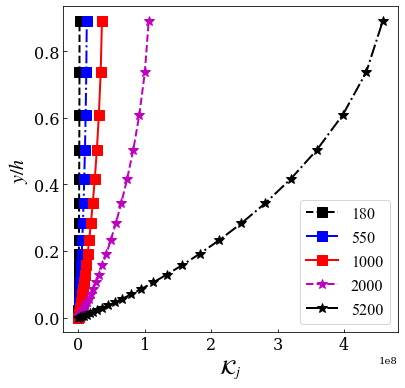

In [5]:
plt.figure(figsize=(6,6))
# plt.title('Explicit Treatment')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for ci in range(5):
    dir_case = test_dir+case_set[ci]
    runTime = str(get_TimeGeneral(dir_case))
    yList = get_FoamData_vector('PointsC', dir_case+'/'+runTime+'/',nCells).values[:,1]
    Kj_exp = get_FoamData_scalar('Kj_exp', dir_case+'/'+runTime+'/',nCells).values
    plt.plot(Kj_exp[::40], yList[::40], symbolStyle[ci], label=str(Re_set[ci]), linewidth=2, markersize=10) # , markerfacecolor='none'

plt.legend(loc='best', prop=myFontXL)# , frameon=False
plt.ylabel(r'$y/h$', fontproperties=myFont, fontsize=20)
plt.xlabel(r'$\mathcal{K}_j$', fontproperties=myFont, fontsize=20)
fName = './figures/Fig_A1_1a_Kj_explicit'
# plt.savefig(fName+'.pdf',bbox_inches='tight')
plt.show()

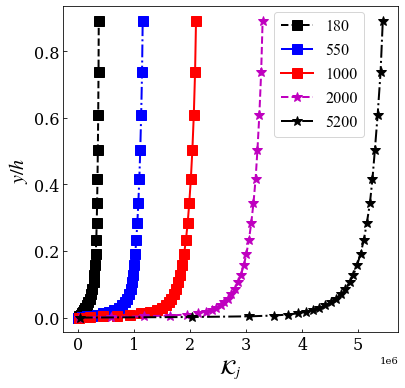

In [6]:
plt.figure(figsize=(6,6))
# plt.title('Implicit Treatment')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for ci in range(5):
    dir_case = test_dir+case_set[ci]
    runTime = str(get_TimeGeneral(dir_case))
    yList = get_FoamData_vector('PointsC', dir_case+'/'+runTime+'/',nCells).values[:,1]
    Kj_imp1 = get_FoamData_scalar('Kj_imp', dir_case+'/'+runTime+'/',nCells).values
    plt.plot(Kj_imp1[::40], yList[::40], symbolStyle[ci], label=str(Re_set[ci]), linewidth=2, markersize=10)
    
plt.legend(loc=[0.63,0.6], prop=myFontXL)# , frameon=False
plt.ylabel(r'$y/h$', fontproperties=myFont, fontsize=20)
plt.xlabel(r'$\mathcal{K}_j$', fontproperties=myFont, fontsize=20)
fName = './figures/Fig_A1_1b_Kj_implicit'
# plt.savefig(fName+'.pdf',bbox_inches='tight')
plt.show()

In [7]:
Kj_vol_imp = np.zeros(5)
Kj_vol_exp = np.zeros(5)
Re_t = np.array([180, 550, 1000, 2000, 5200])
for ci in range(5):
    dir_case = test_dir+case_set[ci]
    Kj_vol_exp[ci] = np.loadtxt(dir_case+'/Kj_vol_exp')
    Kj_vol_imp[ci] = np.loadtxt(dir_case+'/Kj_vol_imp')

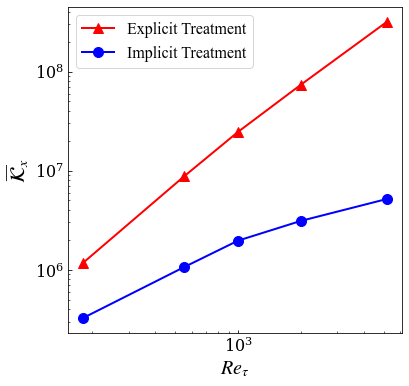

In [8]:
plt.figure(figsize=(6,6))
# plt.title('The volume-averaged local condition number')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.loglog(Re_t, Kj_vol_exp, 'r-^', label='Explicit Treatment', linewidth=2, markersize=10)
plt.loglog(Re_t, Kj_vol_imp, 'b-o', label='Implicit Treatment', linewidth=2, markersize=10)

plt.xlabel(r'$Re_{\tau}$', fontproperties=myFont, fontsize=20)
plt.ylabel(r'$\widebar{\mathcal{K}}_x$', fontproperties=myFont, fontsize=20)
plt.legend(loc='best', prop=myFontXL)# , frameon=False

fName = './figures/Fig_A1_2_Kj_vol_Ret'
# plt.savefig(fName+'.pdf',bbox_inches='tight')
plt.show()

## 2. A Toy Problem

Consider using finite difference method to solve ODE：
$$\frac{dy}{dx}=x,\quad x\in[0,1],\quad y(0)=0$$

The exact solution is $$y = \frac{1}{2}x^2$$

Using $N$ cells uniformly distributed in $[0, 1]$, numbered as $i=0,1,...,N-1$. The grid size would be $\Delta x=\frac{1}{N-1}$

At left boundary: $$y_0 = 0$$

At internal field using second order central difference: $$\frac{dy}{dx}\approx \frac{y_{i+1}-y_{i-1}}{2\Delta x}$$

At right boundary using first order backward difference: $$\frac{dy}{dx}\approx \frac{y_{N-1} - y_{N-2}}{\Delta x}$$

Then coeff matrix $\mathbf{A}$ can be constructed using function `get_CoeffMatrix(N)`, the source term $\mathbf{b}$ can be evaluated by `np.linspace(0,1,N).T`

Finally, the numerical solution $\mathbf{u}$ can be obtained by solving the following algebraic equation systems $$\mathbf{A}\mathbf{u}=\mathbf{b}$$

In [9]:
def get_CoeffMatrix(N=5):
    dx = 1.0/(N-1)
    A = np.zeros((N,N))
    A[0, 0] = dx
    for i in range(1,N-1):
        A[i,i-1] = -0.5
        A[i,i+1] = 0.5
    A[-1, -2] = -1
    A[-1, -1] = 1
    A = A/dx
    # A = 1/dx * np.array([[ dx,   0,   0,   0,   0],\
    #                      [-0.5,   0, 0.5,   0,   0],\
    #                      [  0, -0.5,   0, 0.5,   0],\
    #                      [  0,   0, -0.5,   0, 0.5],\
    #                      [  0,   0,   0,  -1,   1]])
    # print(np.linalg.det(A))
    # b = np.array([0, 0.25, 0.5, 0.75, 1.0]).T
    return A

def get_MatrixC2(N=10):
    A = np.zeros((N,N))
    A[0, 0] = 2
    A[0, 1] = -1
    for i in range(1,N-1):
        A[i, i-1] = -1
        A[i, i] = 2
        A[i, i+1] = -1
    A[-1, -2] = -1
    A[-1, -1] = 2
    return np.matrix(A)

We could also investigate local condition number of $\mathbf{A}$ against grid size $N$

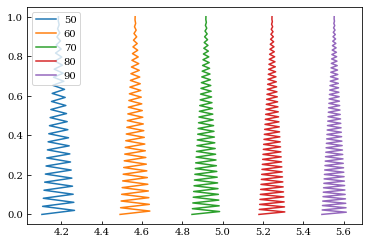

In [10]:
N_set = 10*np.arange(5,10)
kpx = []
plt.figure()
for i,N in enumerate(N_set):
    b = np.linspace(0, 1, N).T
    A = get_CoeffMatrix(N)
    Ainv = np.linalg.inv(A)
    rj = np.zeros(N)
    kj = np.zeros(N)
    kpx.append(np.linalg.norm(A,2)*np.linalg.norm(np.linalg.inv(A),2))
    for j in range(N):
        rj[j] = np.linalg.norm(Ainv[j,:])
        kj[j] = rj[j]*np.linalg.norm(b)
    u = Ainv.dot(b)
    # plt.plot(b, u, label=N)
    plt.plot(kj, b, label=N)
    # plt.plot(rj, b, label=N)
    
# plt.plot(N_set, kpx)
plt.legend()
plt.show()